In [25]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.regularizers import L1, L2, L1L2

In [26]:
df=pd.read_csv('heart.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
#check null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model_l1 = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=L1(0.01)),
    Dense(500, activation='relu', kernel_regularizer=L1(0.01)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [31]:
history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
41/41 [==============================] - 1s 21ms/step - loss: 85.6895 - accuracy: 0.8186 - val_loss: 24.5530 - val_accuracy: 0.7561
Epoch 2/50
41/41 [==============================] - 1s 18ms/step - loss: 7.9015 - accuracy: 0.8293 - val_loss: 2.1824 - val_accuracy: 0.7988
Epoch 3/50
41/41 [==============================] - 1s 18ms/step - loss: 1.4468 - accuracy: 0.8643 - val_loss: 1.3318 - val_accuracy: 0.7866
Epoch 4/50
41/41 [==============================] - 1s 25ms/step - loss: 1.1379 - accuracy: 0.8720 - val_loss: 1.2550 - val_accuracy: 0.8049
Epoch 5/50
41/41 [==============================] - 1s 15ms/step - loss: 1.0848 - accuracy: 0.8704 - val_loss: 1.2437 - val_accuracy: 0.7927
Epoch 6/50
41/41 [==============================] - 1s 15ms/step - loss: 1.0921 - accuracy: 0.8811 - val_loss: 1.3562 - val_accuracy: 0.7866
Epoch 7/50
41/41 [==============================] - 1s 19ms/step - loss: 1.0737 - accuracy: 0.8704 - val_loss: 1.1787 - val_accuracy: 0.7988
Epoch 8/50


In [34]:
model_l2 = Sequential([
    Dense(1023, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=L2(0.01)),
    Dense(500, activation='relu', kernel_regularizer=L2(0.01)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [35]:
history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
41/41 [==============================] - 1s 17ms/step - loss: 3.7581 - accuracy: 0.8460 - val_loss: 1.4822 - val_accuracy: 0.8659
Epoch 2/50
41/41 [==============================] - 1s 14ms/step - loss: 0.8110 - accuracy: 0.8826 - val_loss: 0.6482 - val_accuracy: 0.8537
Epoch 3/50
41/41 [==============================] - 1s 15ms/step - loss: 0.4114 - accuracy: 0.9040 - val_loss: 0.4984 - val_accuracy: 0.8780
Epoch 4/50
41/41 [==============================] - 1s 16ms/step - loss: 0.3533 - accuracy: 0.9162 - val_loss: 0.5249 - val_accuracy: 0.8354
Epoch 5/50
41/41 [==============================] - 1s 14ms/step - loss: 0.3110 - accuracy: 0.9268 - val_loss: 0.5319 - val_accuracy: 0.8354
Epoch 6/50
41/41 [==============================] - 1s 15ms/step - loss: 0.3094 - accuracy: 0.9238 - val_loss: 0.4487 - val_accuracy: 0.8659
Epoch 7/50
41/41 [==============================] - 1s 13ms/step - loss: 0.3008 - accuracy: 0.9238 - val_loss: 0.4189 - val_accuracy: 0.8902
Epoch 8/50
41

In [36]:
model_l1l2 = Sequential([
    Dense(1023, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=L1L2(0.01)),
    Dense(500, activation='relu', kernel_regularizer=L1L2(0.01)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [37]:
model_l1l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history_l1l2 = model_l1l2.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
41/41 [==============================] - 1s 19ms/step - loss: 85.5849 - accuracy: 0.7942 - val_loss: 24.4977 - val_accuracy: 0.7866
Epoch 2/50
41/41 [==============================] - 1s 15ms/step - loss: 7.8837 - accuracy: 0.8308 - val_loss: 2.2296 - val_accuracy: 0.7622
Epoch 3/50
41/41 [==============================] - 1s 15ms/step - loss: 1.4602 - accuracy: 0.8643 - val_loss: 1.3105 - val_accuracy: 0.7866
Epoch 4/50
41/41 [==============================] - 1s 16ms/step - loss: 1.1479 - accuracy: 0.8811 - val_loss: 1.2391 - val_accuracy: 0.7744
Epoch 5/50
41/41 [==============================] - 1s 16ms/step - loss: 1.0832 - accuracy: 0.8857 - val_loss: 1.2150 - val_accuracy: 0.8110
Epoch 6/50
41/41 [==============================] - 1s 17ms/step - loss: 1.0567 - accuracy: 0.8918 - val_loss: 1.2046 - val_accuracy: 0.8049
Epoch 7/50
41/41 [==============================] - 1s 17ms/step - loss: 1.0365 - accuracy: 0.8811 - val_loss: 1.1909 - val_accuracy: 0.8110
Epoch 8/50


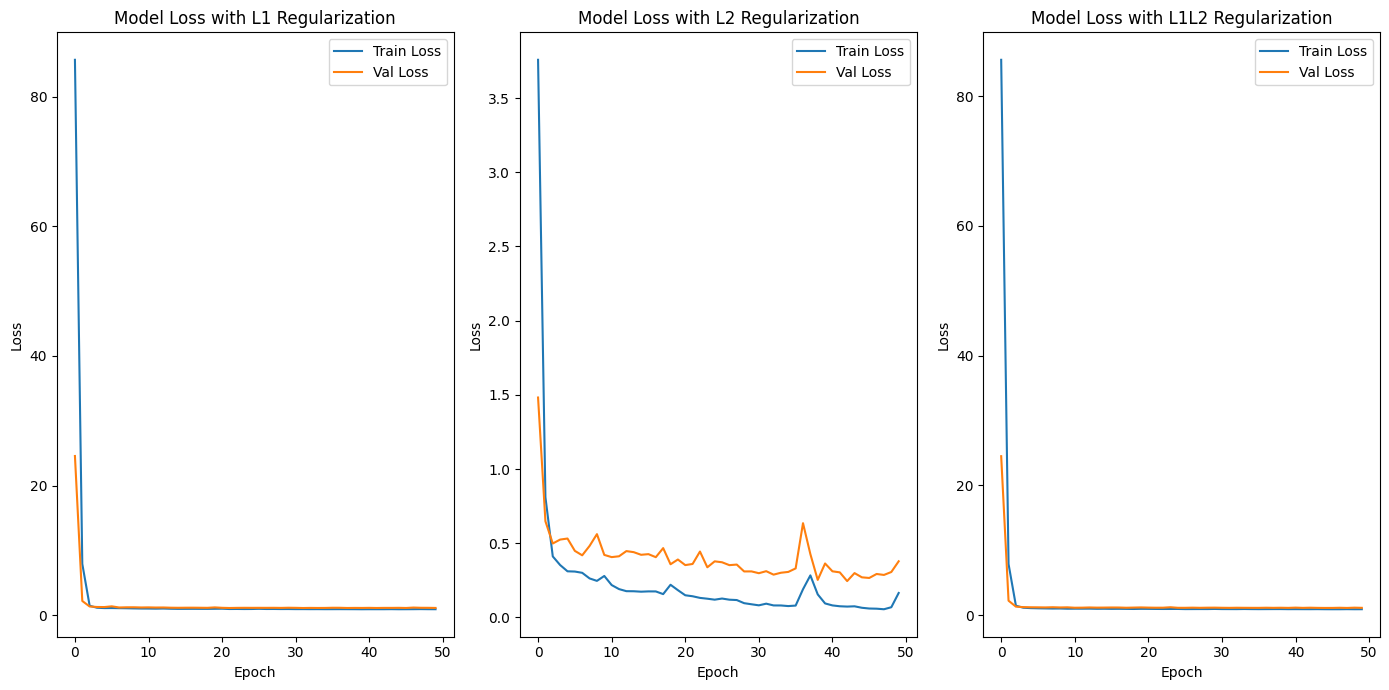

In [40]:
# Plot training & validation loss values
plt.figure(figsize=(14, 7))

# L1 Regularization
plt.subplot(1, 3, 1)
plt.plot(history_l1.history['loss'], label='Train Loss')
plt.plot(history_l1.history['val_loss'], label='Val Loss')
plt.title('Model Loss with L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# L2 Regularization
plt.subplot(1, 3, 2)
plt.plot(history_l2.history['loss'], label='Train Loss')
plt.plot(history_l2.history['val_loss'], label='Val Loss')
plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# L1L2 Regularization
plt.subplot(1, 3, 3)
plt.plot(history_l1l2.history['loss'], label='Train Loss')
plt.plot(history_l1l2.history['val_loss'], label='Val Loss')
plt.title('Model Loss with L1L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


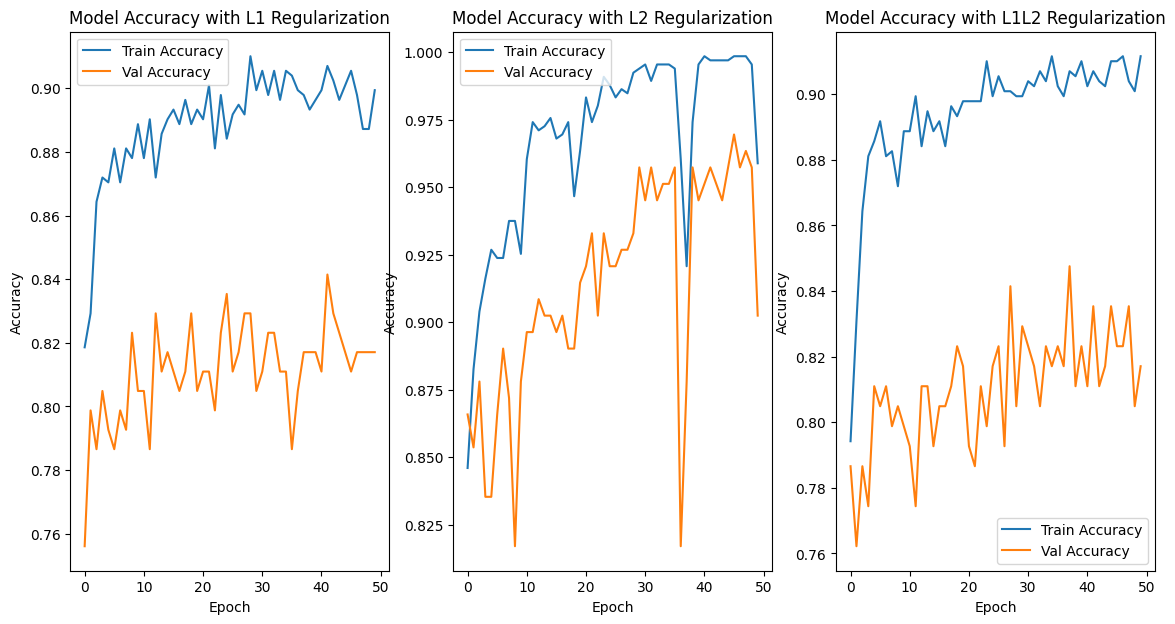

In [41]:
#accuracy graphs for all
plt.figure(figsize=(14, 7))

# L1 Regularization
plt.subplot(1, 3, 1)
plt.plot(history_l1.history['accuracy'], label='Train Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy with L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# L2 Regularization
plt.subplot(1, 3, 2)
plt.plot(history_l2.history['accuracy'], label='Train Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# L1L2 Regularization
plt.subplot(1, 3, 3)
plt.plot(history_l1l2.history['accuracy'], label='Train Accuracy')
plt.plot(history_l1l2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy with L1L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

